<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SQL-Database-Agent" data-toc-modified-id="SQL-Database-Agent-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SQL Database Agent</a></span></li><li><span><a href="#Pandas-Dataframe-Agent" data-toc-modified-id="Pandas-Dataframe-Agent-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas Dataframe Agent</a></span></li><li><span><a href="#Pandas-AI" data-toc-modified-id="Pandas-AI-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pandas AI</a></span><ul class="toc-item"><li><span><a href="#Smart-DataFrame" data-toc-modified-id="Smart-DataFrame-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Smart DataFrame</a></span></li><li><span><a href="#SmartDatalake" data-toc-modified-id="SmartDatalake-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SmartDatalake</a></span></li></ul></li></ul></div>

# SQL Database Agent

In [1]:
!pip install -q langchain openai tabulate python-dotenv

In [1]:
from langchain.agents import create_sql_agent
from langchain.agents.agent_toolkits import SQLDatabaseToolkit
from langchain.sql_database import SQLDatabase
from langchain.agents import AgentExecutor
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI

In [2]:
# Set env var OPENAI_API_KEY or load from a .env file:
import dotenv
dotenv.load_dotenv()

True

In [ ]:
#alternative way to set environment variable
import os
os.environ["OPENAI_API_KEY"] = "your key here"

In [4]:
#create llm
llm = ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo")

In [5]:
#create sql db and toolkit
db = SQLDatabase.from_uri("sqlite:///Chinook.db")
toolkit = SQLDatabaseToolkit(db=db, llm=llm)

In [6]:
#create agent
agent= create_sql_agent(
    llm=llm,
    toolkit=toolkit,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS
)

In [8]:
#describing a table
print(agent.run("Describe the playlisttrack table"))



> Entering new AgentExecutor chain...

Invoking: `sql_db_list_tables` with `{}`


albums, artists, customers, employees, genres, invoice_items, invoices, media_types, playlist_track, playlists, tracks
Invoking: `sql_db_schema` with `playlist_track`



CREATE TABLE playlist_track (
	"PlaylistId" INTEGER NOT NULL, 
	"TrackId" INTEGER NOT NULL, 
	PRIMARY KEY ("PlaylistId", "TrackId"), 
	FOREIGN KEY("PlaylistId") REFERENCES playlists ("PlaylistId"), 
	FOREIGN KEY("TrackId") REFERENCES tracks ("TrackId")
)

/*
3 rows from playlist_track table:
PlaylistId	TrackId
1	3402
1	3389
1	3390
*/

Retrying langchain.chat_models.openai.ChatOpenAI.completion_with_retry.<locals>._completion_with_retry in 4.0 seconds as it raised ServiceUnavailableError: The server is overloaded or not ready yet..


The `playlist_track` table has two columns: `PlaylistId` and `TrackId`. It is a junction table that represents the many-to-many relationship between playlists and tracks. 

The `PlaylistId` column is an integer and is not nullable. It references the `PlaylistId` column in the `playlists` table.

The `TrackId` column is also an integer and is not nullable. It references the `TrackId` column in the `tracks` table.

Here are three example rows from the `playlist_track` table:

| PlaylistId | TrackId |
|------------|---------|
| 1          | 3402    |
| 1          | 3389    |
| 1          | 3390    |

Please let me know if there is anything else I can help with.

> Finished chain.
The `playlist_track` table has two columns: `PlaylistId` and `TrackId`. It is a junction table that represents the many-to-many relationship between playlists and tracks. 

The `PlaylistId` column is an integer and is not nullable. It references the `PlaylistId` column in the `playlists` table.

The `TrackId` col

In [9]:
#running queries
print(agent.run(
    "List the total sales per country. Which country's customers spent the most?"
))



> Entering new AgentExecutor chain...

Invoking: `sql_db_list_tables` with `{}`


albums, artists, customers, employees, genres, invoice_items, invoices, media_types, playlist_track, playlists, tracks
Invoking: `sql_db_schema` with `invoices, customers`



CREATE TABLE customers (
	"CustomerId" INTEGER NOT NULL, 
	"FirstName" NVARCHAR(40) NOT NULL, 
	"LastName" NVARCHAR(20) NOT NULL, 
	"Company" NVARCHAR(80), 
	"Address" NVARCHAR(70), 
	"City" NVARCHAR(40), 
	"State" NVARCHAR(40), 
	"Country" NVARCHAR(40), 
	"PostalCode" NVARCHAR(10), 
	"Phone" NVARCHAR(24), 
	"Fax" NVARCHAR(24), 
	"Email" NVARCHAR(60) NOT NULL, 
	"SupportRepId" INTEGER, 
	PRIMARY KEY ("CustomerId"), 
	FOREIGN KEY("SupportRepId") REFERENCES employees ("EmployeeId")
)

/*
3 rows from customers table:
CustomerId	FirstName	LastName	Company	Address	City	State	Country	PostalCode	Phone	Fax	Email	SupportRepId
1	Luís	Gonçalves	Embraer - Empresa Brasileira de Aeronáutica S.A.	Av. Brigadeiro Faria Lima, 2170	São José dos Campo

In [11]:
print(agent.run(
    "Show the total number of tracks in each playlist. The Playlist name should be included in the result."
))



> Entering new AgentExecutor chain...

Invoking: `sql_db_list_tables` with `{}`


albums, artists, customers, employees, genres, invoice_items, invoices, media_types, playlist_track, playlists, tracks
Invoking: `sql_db_schema` with `playlist_track, playlists, tracks`



CREATE TABLE playlist_track (
	"PlaylistId" INTEGER NOT NULL, 
	"TrackId" INTEGER NOT NULL, 
	PRIMARY KEY ("PlaylistId", "TrackId"), 
	FOREIGN KEY("PlaylistId") REFERENCES playlists ("PlaylistId"), 
	FOREIGN KEY("TrackId") REFERENCES tracks ("TrackId")
)

/*
3 rows from playlist_track table:
PlaylistId	TrackId
1	3402
1	3389
1	3390
*/


CREATE TABLE playlists (
	"PlaylistId" INTEGER NOT NULL, 
	"Name" NVARCHAR(120), 
	PRIMARY KEY ("PlaylistId")
)

/*
3 rows from playlists table:
PlaylistId	Name
1	Music
2	Movies
3	TV Shows
*/


CREATE TABLE tracks (
	"TrackId" INTEGER NOT NULL, 
	"Name" NVARCHAR(200) NOT NULL, 
	"AlbumId" INTEGER, 
	"MediaTypeId" INTEGER NOT NULL, 
	"GenreId" INTEGER, 
	"Composer" NVARCHAR(220), 
	"Mill

# Pandas Dataframe Agent

In [3]:
from langchain.agents import create_pandas_dataframe_agent
import pandas as pd

In [13]:
#read data
df = pd.read_csv("titanic.csv")

In [14]:
#create agent
agent = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0, model="gpt-3.5-turbo"),
    df,
    verbose=True,
    agent_type=AgentType.OPENAI_FUNCTIONS,
)

In [15]:
agent.run("how many rows are there?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.shape[0]'}`


891There are 891 rows in the dataframe.

> Finished chain.


'There are 891 rows in the dataframe.'

In [16]:
agent.run("how many people have more than 3 siblings")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "df[df['SibSp'] > 3]['PassengerId'].count()"}`


30There are 30 people in the dataframe who have more than 3 siblings.

> Finished chain.


'There are 30 people in the dataframe who have more than 3 siblings.'

In [17]:
agent.run("whats the square root of the average age?")



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import pandas as pd\nimport math\n\n# Create a dataframe\ndata = {'Age': [22, 38, 26, 35, 35]}\ndf = pd.DataFrame(data)\n\n# Calculate the average age\naverage_age = df['Age'].mean()\n\n# Calculate the square root of the average age\nsquare_root = math.sqrt(average_age)\n\nsquare_root"}`


5.585696017507576The square root of the average age is approximately 5.59.

> Finished chain.


'The square root of the average age is approximately 5.59.'

# Pandas AI

In [18]:
!pip install -q pandasai

## Smart DataFrame

In [2]:
from pandasai import SmartDataframe
import pandas as pd

In [3]:
df = pd.DataFrame({
    "country": [
        "United States",
        "United Kingdom",
        "France",
        "Germany",
        "Italy",
        "Spain",
        "Canada",
        "Australia",
        "Japan",
        "China",
    ],
    "gdp": [
        19294482071552,
        2891615567872,
        2411255037952,
        3435817336832,
        1745433788416,
        1181205135360,
        1607402389504,
        1490967855104,
        4380756541440,
        14631844184064,
    ],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12],
})

df

,country,gdp,happiness_index
0,United States,19294482071552,6.94
1,United Kingdom,2891615567872,7.16
2,France,2411255037952,6.66
3,Germany,3435817336832,7.07
4,Italy,1745433788416,6.38
5,Spain,1181205135360,6.40
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
8,Japan,4380756541440,5.87
9,China,14631844184064,5.12


In [21]:
from pandasai.llm import OpenAI

llm = OpenAI(temperature=0.7)

In [22]:
sdf = SmartDataframe(df, config={"llm": llm})

In [23]:
sdf[sdf['country'] == 'United States']

,country,gdp,happiness_index
0,United States,19294482071552,6.94


In [24]:
sdf.chat("Return the top 5 countries by GDP")

,country,gdp,happiness_index
0,United States,19294482071552,6.94
9,China,14631844184064,5.12
8,Japan,4380756541440,5.87
3,Germany,3435817336832,7.07
1,United Kingdom,2891615567872,7.16


In [25]:
sdf.chat("What's the sum of the gdp of the 2 unhappiest countries?")

19012600725504

In [27]:
print(sdf.last_code_generated)

# TODO import all the dependencies required
import pandas as pd

# Analyze the data
# 1. Prepare: Preprocessing and cleaning data if necessary
# 2. Process: Manipulating data for analysis (grouping, filtering, aggregating, etc.)
# 3. Analyze: Conducting the actual analysis (if the user asks to create a chart save it to an image in exports/charts/temp_chart.png and do not show the chart.)
# 4. Output: return a dictionary of:
# - type (possible values "text", "number", "dataframe", "plot")
# - value (can be a string, a dataframe or the path of the plot, NOT a dictionary)
# Example output: { "type": "text", "value": "The average loan amount is $15,000." }
def analyze_data(dfs: list[pd.DataFrame]) -> dict:
    # Combine all dataframes into one
    df_combined = pd.concat(dfs)

    # Sort the data by happiness index in ascending order
    df_combined_sorted = df_combined.sort_values('happiness_index')

    # Get the sum of GDP for the 2 unhappiest countries
    sum_gdp_unhappiest = df_combi

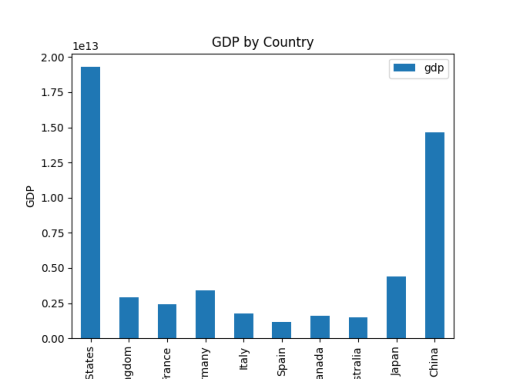

In [29]:
sdf.chat("Plot a chart of the gdp by country");

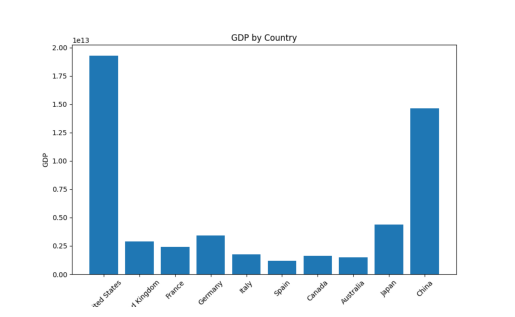

In [30]:
sdf.plot_bar_chart(x="country", y="gdp")

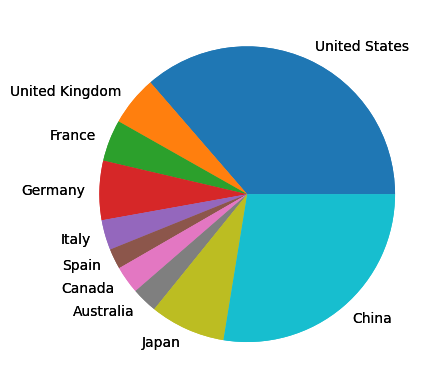

In [31]:
sdf.plot_pie_chart(labels="country", values="gdp")

## SmartDatalake

In [5]:
from pandasai import SmartDatalake

In [6]:
employees_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Name": ["John", "Emma", "Liam", "Olivia", "William"],
        "Department": ["HR", "Sales", "IT", "Marketing", "Finance"],
    }
)

In [7]:
salaries_df = pd.DataFrame(
    {
        "EmployeeID": [1, 2, 3, 4, 5],
        "Salary": [5000, 6000, 4500, 7000, 5500],
    }
)

In [10]:
lake = SmartDatalake(
    [employees_df, salaries_df],
    config={"llm": llm}
)

In [11]:
lake.chat("Who gets paid the most?")

'The employee who gets paid the most is Olivia.'

In [12]:
print(lake.last_code_executed)

def analyze_data(dfs: list[pd.DataFrame]) ->dict:
    merged_df = pd.merge(dfs[0], dfs[1], on='EmployeeID')
    highest_paid_employee = merged_df.loc[merged_df['Salary'].idxmax(), 'Name']
    return {'type': 'text', 'value': f'The employee who gets paid the most is {highest_paid_employee}.'}


result = analyze_data(dfs)
